In [1]:
import numpy as np
import pandas as pd

import datetime
from datetime import datetime, date

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sp500 = pd.read_csv('../data/sp500.csv',
                   index_col = 'Symbol',
                   usecols=[0,2,3,7])

omh = pd.read_csv('../data/omh.csv')
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [5]:
# make the quantiles at the +/-3, 2 and 1 std deviations
quantiles = [0,
            0.001,
            0.021,
            0.5-0.341,
            0.5,
            0.5+0.341,
            1.0-0.021,
            1.0-0.001,
            1.0]
qbin = pd.qcut(dist, quantiles) # 분위수의 범위 지정 표준편차 기준 구간 비율로 나눔

qbin.describe()

                    counts  freqs
categories                       
(-3.522, -3.131]        10  0.001
(-3.131, -2.056]       200  0.020
(-2.056, -1.033]      1380  0.138
(-1.033, -0.00363]    3410  0.341
(-0.00363, 1.011]     3410  0.341
(1.011, 2.043]        1380  0.138
(2.043, 3.062]         200  0.020
(3.062, 3.698]          10  0.001

In [6]:
quantiles1 = [0, 0.001, 0.025, 0.159, 0.7, 0.841, 0.979, 0.999, 1.0]
qbin1 = pd.qcut(dist, quantiles1)

qbin1.describe()

                  counts  freqs
categories                     
(-3.522, -3.131]      10  0.001
(-3.131, -1.977]     240  0.024
(-1.977, -1.033]    1340  0.134
(-1.033, 0.526]     5410  0.541
(0.526, 1.011]      1410  0.141
(1.011, 2.043]      1380  0.138
(2.043, 3.062]       200  0.020
(3.062, 3.698]        10  0.001

# Ranking

In [8]:
# random data
np.random.seed(12345)
s = pd.Series(np.random.randn(5), index=list('abcde'))
s

a   -0.204708
b    0.478943
c   -0.519439
d   -0.555730
e    1.965781
dtype: float64

In [9]:
# rank the values
s.rank() #기본 오름차순 순위

a    3.0
b    4.0
c    2.0
d    1.0
e    5.0
dtype: float64

In [11]:
s.rank(ascending=False) # 내림차순 순위

a    3.0
b    2.0
c    4.0
d    5.0
e    1.0
dtype: float64

In [12]:
s.rank(method='first') # 동점 관측치 중에서 데이터 상에 먼저 나타나는 관측치부터 순위 부여, 오름차순 순위)
# 평균(method='average') : 동점 관측치 간의 그룹 내 평균 순위 부여

a    3.0
b    4.0
c    2.0
d    1.0
e    5.0
dtype: float64

# Percent change(각 표본의 변동률 계산, 기간에 따른 변동을 계산)

In [13]:
# calculate % change on MSFT

In [15]:
omh[['MSFT']].pct_change()[:5] # 주어진 기간의 백분율 변화량 계산, 현재 요소와 이전 요소 간의 비율 변경을 계산합니다
# 이 함수는 기본적으로 직전 행에서 변경한 비율을 계산함 (이전요소-현재요소, 차이/현재요소)

       MSFT
0       NaN
1 -0.003291
2 -0.007842
3  0.015807
4 -0.008600

In [16]:
omh.MSFT

0     48.62
1     48.46
2     48.08
3     48.84
4     48.42
      ...  
17    48.14
18    47.88
19    47.45
20    47.02
21    46.45
Name: MSFT, Length: 22, dtype: float64

# Rolling Window

In [18]:
np.random.seed(123456)
s = pd.Series(np.random.randn(1000)).cumsum()
s[:5]

0    0.469112
1    0.186249
2   -1.322810
3   -2.458442
4   -1.246330
dtype: float64

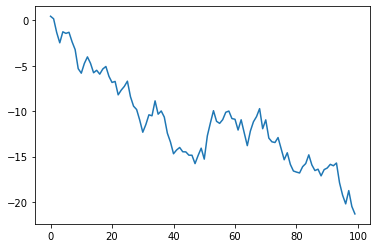

In [19]:
s[:100].plot()

In [20]:
# calculate rolling window of three days
r = s.rolling(window=3) # .rolling(): 윈도우의 크기 전달 객체 생성
r

Rolling [window=3,center=False,axis=0]

In [21]:
# the rolling mean at three days
means = r.mean()
means[:7] # 0~3행의 평균이 2행 평균 값, 1~4행이 3행 평균 값

0         NaN
1         NaN
2   -0.222483
3   -1.198334
4   -1.675860
5   -1.708105
6   -1.322070
dtype: float64

In [22]:
# check the mean of the first 3 numbers
s[:3].mean()

-0.22248276403642672

In [23]:
# mean of 1 through 3
s[1:4].mean()

-1.1983341702095498

# Random sampling(무작위 표본 값을 선택하는 과정)

In [24]:
# create a random sample of four columns of 50 items
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(50,4))
df[:5]

          0         1         2         3
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401

In [25]:
# sample three random rows
df.sample(n=3) # sample 함수를 통해 무작위 로우 개수

           0         1         2         3
15 -0.076467 -1.187678  1.130127 -1.436737
28 -2.182937  0.380396  0.084844  0.432390
48 -0.693921  1.613616  0.464000  0.227371

In [26]:
# sample 10% of the rows
df.sample(frac=0.1) #무작위 표집 비율 분위 10%

           0         1         2         3
37  1.126203 -0.977349  1.474071 -0.064034
10 -1.294524  0.413738  0.276662 -0.472035
4  -0.424972  0.567020  0.276232 -1.087401
14  0.410835  0.813850  0.132003 -0.827317
48 -0.693921  1.613616  0.464000  0.227371

In [27]:
# 10% with replacement
df.sample(frac=0.1, replace=True) # 선택된 표본을 다시 선택할 수 있도록 파라미터 설정

           0         1         2         3
27 -1.236269  0.896171 -0.487602 -0.082240
9   0.357021 -0.674600 -1.776904 -0.968914
27 -1.236269  0.896171 -0.487602 -0.082240
15 -0.076467 -1.187678  1.130127 -1.436737
9   0.357021 -0.674600 -1.776904 -0.968914

# Working with missing data(결측 데이터 다루기)

In [29]:
df = pd.DataFrame(np.arange(0,15).reshape(5,3),
                 index=['a','b','c','d','e'],
                 columns=['c1','c2','c3'])
df

   c1  c2  c3
a   0   1   2
b   3   4   5
c   6   7   8
d   9  10  11
e  12  13  14

In [30]:
# add some columns and rows to the DF
# column c4 with NaN values
df['c4'] = np.nan

# row 'f' with 15 through 18
df.loc['f'] = np.arange(15,19)

# row 'g' will all NaN
df.loc['g'] = np.nan

# column 'c5' with NaNs
df['c5'] = np.nan

# change value in col 'c4' row 'a'
df['c4']['a'] = 20
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

# Determining NaN values in Series and DF objects(NaN값 찾기)

In [31]:
df.isnull()

      c1     c2     c3     c4    c5
a  False  False  False  False  True
b  False  False  False   True  True
c  False  False  False   True  True
d  False  False  False   True  True
e  False  False  False   True  True
f  False  False  False  False  True
g   True   True   True   True  True

In [32]:
df.isnull().sum()

c1    1
c2    1
c3    1
c4    5
c5    7
dtype: int64

In [33]:
# total count of NaN values
df.isnull().sum().sum()

15

In [35]:
# number of non-NaN values in each column
df.count()

c1    6
c2    6
c3    6
c4    2
c5    0
dtype: int64

In [36]:
# and this counts the number of NaN's too
(len(df) - df.count()).sum()

15

In [37]:
df.notnull()

      c1     c2     c3     c4     c5
a   True   True   True   True  False
b   True   True   True  False  False
c   True   True   True  False  False
d   True   True   True  False  False
e   True   True   True  False  False
f   True   True   True   True  False
g  False  False  False  False  False

# Selecting out or dropping missing data(결측 데이터의 판별과 삭제)

In [38]:
# select the non-NaN items in column c4
df.c4[df.c4.notnull()]

a    20.0
f    18.0
Name: c4, dtype: float64

In [39]:
# .dropna will also return non NaN values
# this gets all non NaN items in column c4
df.c4.dropna()

a    20.0
f    18.0
Name: c4, dtype: float64

In [40]:
# dropna returns a copy with the values dropped
# the source DF / column is not changed
df.c4

a    20.0
b     NaN
c     NaN
d     NaN
e     NaN
f    18.0
g     NaN
Name: c4, dtype: float64

In [41]:
# on a DF this will drop entire rows
# where there is at least one NaN
# in this case, that is all rows
df.dropna()

Empty DataFrame
Columns: [c1, c2, c3, c4, c5]
Index: []

In [42]:
# using how = 'all', only rows that have all values
# as NaN will be dropped
df.dropna(how = 'all') # 모두 NaN 인 행인 g행 삭제

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN

In [43]:
# flip to drop columns instead of rows
df.dropna(how='all', axis=1) # say goodbye to c5 모두 NaN인 열인 c5 열 삭제

     c1    c2    c3    c4
a   0.0   1.0   2.0  20.0
b   3.0   4.0   5.0   NaN
c   6.0   7.0   8.0   NaN
d   9.0  10.0  11.0   NaN
e  12.0  13.0  14.0   NaN
f  15.0  16.0  17.0  18.0
g   NaN   NaN   NaN   NaN

In [44]:
# make a copy of df
df2 = df.copy()

# replace two NaN cells with values
df2.loc['g'].c1 = 0
df2.loc['g'].c3 = 0
df2

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   0.0   NaN   0.0   NaN NaN

In [45]:
# now drop columns with any NaN values
df2.dropna(how = 'any', axis=1)

     c1    c3
a   0.0   2.0
b   3.0   5.0
c   6.0   8.0
d   9.0  11.0
e  12.0  14.0
f  15.0  17.0
g   0.0   0.0

In [46]:
# only drop columns with at least 5 NaN values
df.dropna(thresh=5, axis=1) # thresh = 5: NaN 값 개수가 적어도 5개 이상 NaN 값이 있는 컬럼 삭제

     c1    c2    c3
a   0.0   1.0   2.0
b   3.0   4.0   5.0
c   6.0   7.0   8.0
d   9.0  10.0  11.0
e  12.0  13.0  14.0
f  15.0  16.0  17.0
g   NaN   NaN   NaN

In [48]:
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

In [49]:
# only drop columns with at least 5 values
df.dropna(thresh=5, axis=1, inplace=True)

In [50]:
df

     c1    c2    c3
a   0.0   1.0   2.0
b   3.0   4.0   5.0
c   6.0   7.0   8.0
d   9.0  10.0  11.0
e  12.0  13.0  14.0
f  15.0  16.0  17.0
g   NaN   NaN   NaN

# How pandas handles NaN's in mathematical operations(수식 연산에서의 NaN 처리 방식)

In [51]:
# create a Numpy array with one NaN value
a = np.array([1,2, np.nan, 3])

# create a Series from the array
s = pd.Series(a)

# the mean of each is different
a.mean(), s.mean()

(nan, 2.0)

In [57]:
# demonstrate sum, mean and cumsum handling of NaN
# get one column
s = df2.c4
s.sum() # NaN treated as 0

38.0

In [56]:
s.mean() # NaN treated as 0

19.0

In [58]:
# as 0 in the cumsum, but NaN's preserved in result Series
s.cumsum()

a    20.0
b     NaN
c     NaN
d     NaN
e     NaN
f    38.0
g     NaN
Name: c4, dtype: float64

In [59]:
# in arithmetic, a NaN value will result in NaN
df2.c4 + 1

a    21.0
b     NaN
c     NaN
d     NaN
e     NaN
f    19.0
g     NaN
Name: c4, dtype: float64

In [60]:
df = df2

In [61]:
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   0.0   NaN   0.0   NaN NaN

# Filling in missing data(결측 데이터 보강)

In [62]:
# return a new DF with NaN's filled with 0
filled = df.fillna(0)
filled

     c1    c2    c3    c4   c5
a   0.0   1.0   2.0  20.0  0.0
b   3.0   4.0   5.0   0.0  0.0
c   6.0   7.0   8.0   0.0  0.0
d   9.0  10.0  11.0   0.0  0.0
e  12.0  13.0  14.0   0.0  0.0
f  15.0  16.0  17.0  18.0  0.0
g   0.0   0.0   0.0   0.0  0.0

In [63]:
# NaN's don't count as an item in calculating
# the means
df.mean()

c1     6.428571
c2     8.500000
c3     8.142857
c4    19.000000
c5          NaN
dtype: float64

In [64]:
# having replaced NaN with 0 can make
# operations such as mean have different results
filled.mean()

c1    6.428571
c2    7.285714
c3    8.142857
c4    5.428571
c5    0.000000
dtype: float64

# Forward and backwards filling of missing values(결측 값 채우기)

In [65]:
# extract the c4 column and fill NaNs forward
df.c4.fillna(method='ffill')

a    20.0
b    20.0
c    20.0
d    20.0
e    20.0
f    18.0
g    18.0
Name: c4, dtype: float64

In [66]:
# perform a backwards fill
df.c4.fillna(method='bfill')

a    20.0
b    18.0
c    18.0
d    18.0
e    18.0
f    18.0
g     NaN
Name: c4, dtype: float64

# Filling using index labels(인덱스 레이블을 사용한 채우기)

In [67]:
# create a new Series of values to be used to fill NaN's where index label matches
fill_values = pd.Series([100, 101, 102], index=['a','e','g'])
fill_values

a    100
e    101
g    102
dtype: int64

In [68]:
# using c4, fill using fill_values
# a, e and g will be filled with matching values
df.c4.fillna(fill_values)

a     20.0
b      NaN
c      NaN
d      NaN
e    101.0
f     18.0
g    102.0
Name: c4, dtype: float64

In [69]:
df.mean()

c1     6.428571
c2     8.500000
c3     8.142857
c4    19.000000
c5          NaN
dtype: float64

In [70]:
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   0.0   NaN   0.0   NaN NaN

In [71]:
# fill NaN values in each column with the mean of the values in that column
df.fillna(df.mean())

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0  19.0 NaN
c   6.0   7.0   8.0  19.0 NaN
d   9.0  10.0  11.0  19.0 NaN
e  12.0  13.0  14.0  19.0 NaN
f  15.0  16.0  17.0  18.0 NaN
g   0.0   8.5   0.0  19.0 NaN

# Interpolation of missing values(보간법을 사용한 결측 값 채우기)

In [72]:
# linear interpolate the NaN values from 1 through 2
s = pd.Series([1, np.nan, np.nan, np.nan, 2]) # (2.0-1.0)/(5-1)
s.interpolate()

0    1.00
1    1.25
2    1.50
3    1.75
4    2.00
dtype: float64

In [73]:
# create a time series, but missing one date in the Series
ts = pd.Series([1, np.nan, 2],
              index=[datetime(2014, 1, 1),
                    datetime(2014, 2, 1),
                    datetime(2014, 4, 1)])
ts

2014-01-01    1.0
2014-02-01    NaN
2014-04-01    2.0
dtype: float64

In [74]:
# linear interpolate based on number of items in the series
ts.interpolate() # 1.0+(2.0-1.0)/2 = 1.5

2014-01-01    1.0
2014-02-01    1.5
2014-04-01    2.0
dtype: float64

In [75]:
# this accounts for the fact that we don't have
# an entry for 2014-03-01, 1.0+(2.0-1.0)/3 = 1.3
ts.interpolate(method='time') # 2014-03-01 데이터가 계산되지 않을 때, time 보간법으로 지정 해결

2014-01-01    1.000000
2014-02-01    1.344444
2014-04-01    2.000000
dtype: float64

In [76]:
# a Series to demonstrate index label based interpolation
s = pd.Series([0, np.nan, 100], index=[0,1,10])
s

0       0.0
1       NaN
10    100.0
dtype: float64

In [77]:
# linear interpolate
s.interpolate() # (100.0-0.0)/(3-1)

0       0.0
1      50.0
10    100.0
dtype: float64

In [78]:
# interpolate based upon the values in the index
s.interpolate(method='values') # 0에서 10 사이에 1/10의 위치이므로 0 + (100-0)/10 = 10.0

0       0.0
1      10.0
10    100.0
dtype: float64

# Handling Duplicate Data(중복 데이터 다루기)

In [79]:
# a DF with lots of duplicate data
data = pd.DataFrame({'a':['x']*3 + ['y']*4,
                    'b': [1, 1, 2, 3, 3, 4, 4]})
data

   a  b
0  x  1
1  x  1
2  x  2
3  y  3
4  y  3
5  y  4
6  y  4

In [80]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [81]:
# drop duplicate rows retaining first row of the duplicates
data.drop_duplicates()

   a  b
0  x  1
2  x  2
3  y  3
5  y  4

In [82]:
# drop duplicate rows , only keeping the first instance of any data
data.drop_duplicates(keep='last')

   a  b
1  x  1
2  x  2
4  y  3
6  y  4

In [83]:
data

   a  b
0  x  1
1  x  1
2  x  2
3  y  3
4  y  3
5  y  4
6  y  4

In [84]:
# add a column c with values 0..6
# this makes .duplicated() report no duplicate rows
data['c'] = range(7)
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [85]:
# but if we specify duplicates to be dropped only in clumns a & b
# they will be dropped
data.drop_duplicates(['a','b'])

   a  b  c
0  x  1  0
2  x  2  2
3  y  3  3
5  y  4  5